In [19]:
from backend.db_setup import SessionLocal
from backend.models import MyStock, MyStockData


with SessionLocal() as session:
    # Get all tables in the database
    eth: MyStock = MyStock.get_by_id(session, 45)
    eth_data = eth.get_stock_data(session, limit=1000)

    alb: MyStock = MyStock.get_by_id(session, 5)
    alb_data = alb.get_stock_data(session, limit=1000)
    eth_data = eth_data.iloc[::-1].reset_index(drop=True)
    alb_data = alb_data.iloc[::-1].reset_index(drop=True)


    alb_daily = MyStock.get_by_id(session, 44)
    alb_daily_data = alb_daily.get_stock_data(session, limit=2000)
    alb_daily_data = alb_daily_data.iloc[::-1].reset_index(drop=True)

    eth_daily = MyStock.get_by_id(session, 47)
    eth_daily_data = eth_daily.get_stock_data(session, limit=379)
    eth_daily_data = eth_daily_data.iloc[::-1].reset_index(drop=True)


alb_data.head()


,id,stock_id,close,open,high,low,volume,timestamp
0,104841,5,0.119653,0.119653,0.119653,0.119653,0,2025-05-15 00:00:00
1,7302,5,0.125945,0.125945,0.125945,0.125945,0,2025-05-15 02:11:00
2,104870,5,0.122145,0.122145,0.122145,0.122145,0,2025-05-16 00:00:00
3,104869,5,0.122153,0.122153,0.122153,0.122153,0,2025-05-16 00:00:00
4,104878,5,0.119963,0.119963,0.119963,0.119963,0,2025-05-16 00:00:00


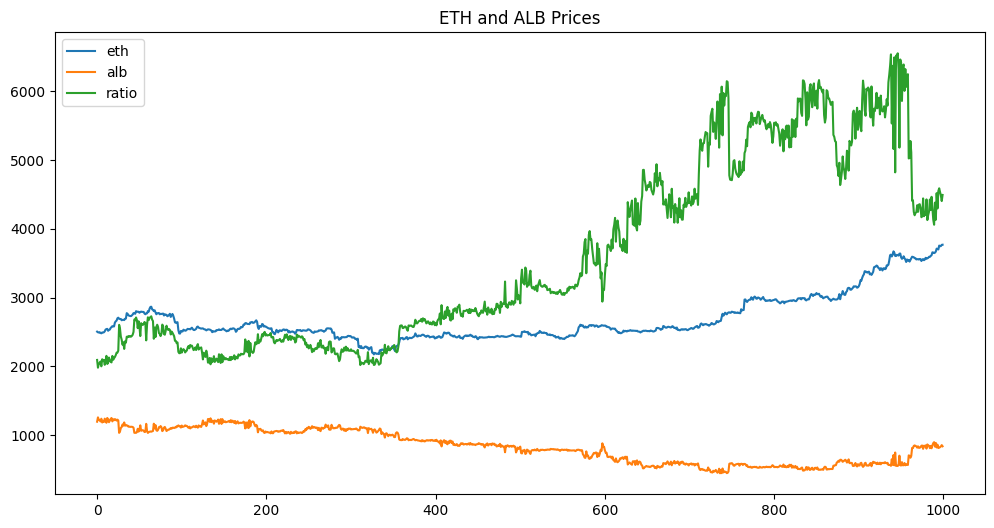

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

new_db = pd.DataFrame({
    'eth': eth_data.close,
    'alb': alb_data.close * 10000,
    'ratio': (eth_data.close / alb_data.close) / 10
})
new_db.plot(figsize=(12, 6), title='ETH and ALB Prices')
plt.show()

<Axes: title={'center': 'ETH and ALB Daily Prices'}>

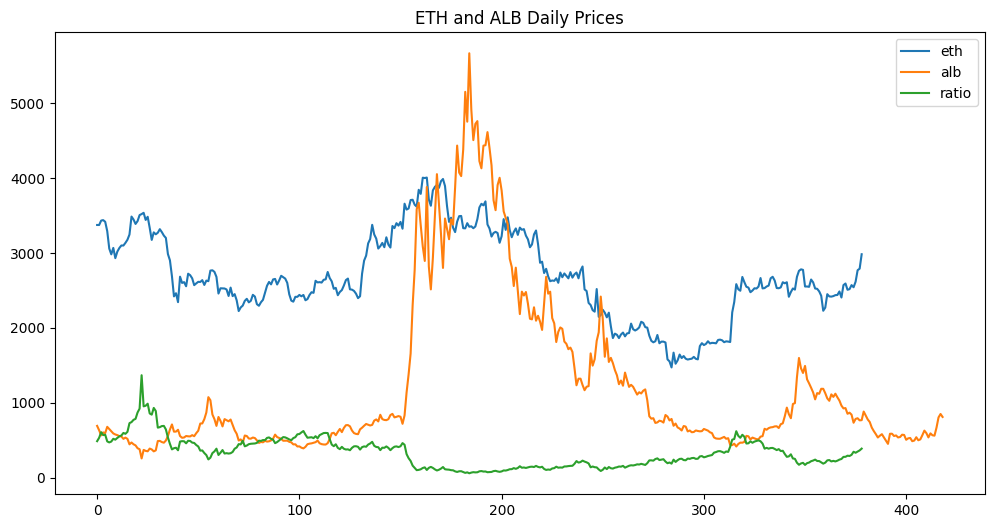

In [21]:
daily_df = pd.DataFrame({
    'eth': eth_daily_data.close,
    'alb': alb_daily_data.close * 10000,
    'ratio': (eth_daily_data.close / alb_daily_data.close) / 100
})
daily_df.plot(figsize=(12, 6), title='ETH and ALB Daily Prices')


<Axes: title={'center': 'ETH Daily Prices'}>

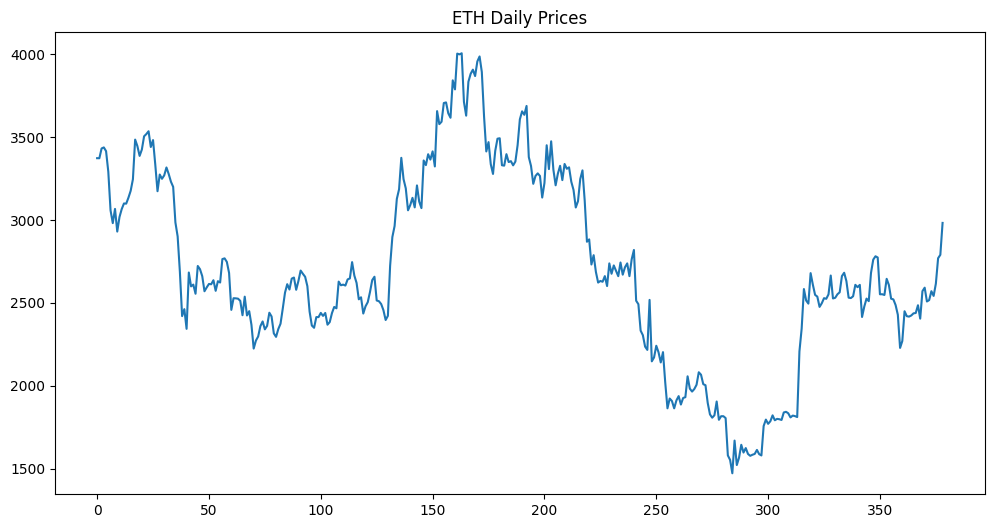

In [22]:
eth_daily_data.close.plot(figsize=(12, 6), title='ETH Daily Prices')

In [23]:
from strategy.indicators import Regime, TradingRangePeak
import plotly.graph_objects as go

def plot_regime(data):

    r = Regime()

    r_df = pd.DataFrame({
        'close': data,
        'high': data,
        'low': data,
        'open': data,
    })

    res = r.update(r_df)

    fig = r.plot(res.enhanced_price_data)

    trp = TradingRangePeak(res.peak_table, peak_window=3)
    trp_data = trp.update(res.enhanced_price_data)
    trp.plot(trp_data, fig) 
    print(trp_data.tail())
    fig.update_layout(template='plotly_dark', title='ETH/ALB Regime Analysis')
    fig.show()
    return res, trp_data

In [24]:
plot_regime(alb_daily_data.close)

Index(['close', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3', 'lo3', 'rg', 'flr', 'clg',
       'rg_ch'],
      dtype='object')
          close       hi1       lo1  hi2  lo2  hi3  lo3   rg  flr  clg  \
index                                                                    
414    0.056131       NaN  0.056131  NaN  NaN  NaN  NaN -1.0  NaN  NaN   
415    0.066845       NaN       NaN  NaN  NaN  NaN  NaN -1.0  NaN  NaN   
416    0.080494       NaN       NaN  NaN  NaN  NaN  NaN -1.0  NaN  NaN   
417    0.085063  0.085063       NaN  NaN  NaN  NaN  NaN -1.0  NaN  NaN   
418    0.081099       NaN       NaN  NaN  NaN  NaN  NaN -1.0  NaN  NaN   

          rg_ch  rolling_max  rolling_min  trading_range  \
index                                                      
414    0.159813     0.159813     0.041632       0.118182   
415    0.159813     0.159813     0.041632       0.118182   
416    0.159813     0.159813     0.041632       0.118182   
417    0.159813     0.159813     0.041632       0.118182   
418 

/home/brian/repos/streamlit-stock-gui/venv/lib/python3.10/site-packages/src/regime/utils.py:780: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



AttributeError: 'FcStrategyTables' object has no attribute 'stats_history'

In [25]:
alb_daily_data.tail()

,id,stock_id,close,open,high,low,volume,timestamp
414,179521,44,0.056131,0.056131,0.056131,0.056131,0,2025-07-16
415,179520,44,0.066845,0.066845,0.066845,0.066845,0,2025-07-17
416,179508,44,0.080494,0.080494,0.080494,0.080494,0,2025-07-18
417,179519,44,0.085063,0.085063,0.085063,0.085063,0,2025-07-19
418,179507,44,0.081099,0.081099,0.081099,0.081099,0,2025-07-20


In [26]:

regime_data, trp = plot_regime(eth_data.close)
trp.to_csv('trp.csv', index=False)
regime_data.enhanced_price_data
eth_data.to_csv('eth_data.csv', index=False)

/home/brian/repos/streamlit-stock-gui/venv/lib/python3.10/site-packages/src/regime/utils.py:780: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Index(['close', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3', 'lo3', 'rg', 'flr', 'clg',
       'rg_ch'],
      dtype='object')
         close      hi1      lo1  hi2  lo2  hi3  lo3   rg  flr  clg   rg_ch  \
index                                                                         
995    3757.68  3757.68      NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  2774.1   
996    3748.55      NaN  3748.55  NaN  NaN  NaN  NaN  1.0  NaN  NaN  2774.1   
997    3750.18      NaN      NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  2774.1   
998    3769.08      NaN      NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  2774.1   
999    3770.49      NaN      NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  2774.1   

       rolling_max  rolling_min  trading_range  trading_range_lo_band  \
index                                                                   
995        3757.68      2917.04         840.64              3429.8304   
996        3757.68      2917.04         840.64              3429.8304   
997        3757.68      2917.04      

In [27]:
plot_regime(daily_df.ratio)

/home/brian/repos/streamlit-stock-gui/venv/lib/python3.10/site-packages/src/regime/utils.py:780: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Index(['close', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3', 'lo3', 'rg', 'flr', 'clg',
       'rg_ch'],
      dtype='object')
       close  hi1  lo1  hi2  lo2  hi3  lo3   rg  flr  clg       rg_ch  \
index                                                                   
414      NaN  NaN  NaN  NaN  NaN  NaN  NaN -1.0  NaN  NaN  478.765382   
415      NaN  NaN  NaN  NaN  NaN  NaN  NaN -1.0  NaN  NaN  478.765382   
416      NaN  NaN  NaN  NaN  NaN  NaN  NaN -1.0  NaN  NaN  478.765382   
417      NaN  NaN  NaN  NaN  NaN  NaN  NaN -1.0  NaN  NaN  478.765382   
418      NaN  NaN  NaN  NaN  NaN  NaN  NaN -1.0  NaN  NaN  478.765382   

       rolling_max  rolling_min  trading_range  trading_range_lo_band  \
index                                                                   
414     620.634162    89.794868     530.839294             413.606837   
415     620.634162    89.794868     530.839294             413.606837   
416     620.634162    89.794868     530.839294             413.606837   
417   

AttributeError: 'FcStrategyTables' object has no attribute 'stats_history'

In [30]:
from backend.db_setup import SessionLocal
from backend.models.models import StockData
import pandas as pd
with SessionLocal() as session:
    unique_stock_ids = session.query(StockData.stock_id).distinct().all()
    print("Unique stock_id values:", pd.Series(unique_stock_ids))


from backend.models.models import Stock

with SessionLocal() as session:
    stock_ids = session.query(Stock.id).all()
    print("Stock table IDs:", pd.Series(stock_ids))


Unique stock_id values: 0     (42)
1     (54)
2      (4)
3     (51)
4     (41)
5     (46)
6     (40)
7     (52)
8     (53)
9      (7)
10     (9)
11    (45)
12     (6)
13    (48)
14    (12)
15    (39)
16    (57)
17    (50)
18    (21)
19    (49)
20    (47)
21    (14)
22     (3)
23    (13)
24     (1)
25     (5)
26     (2)
27    (56)
28    (11)
29     (8)
30    (44)
dtype: object
Stock table IDs: 0      (1)
1      (2)
2      (3)
3      (4)
4      (7)
5     (10)
6     (11)
7     (12)
8     (13)
9     (14)
10    (15)
11    (16)
12    (17)
13    (18)
14    (20)
15    (41)
16     (5)
17     (6)
18     (8)
19     (9)
20    (44)
21    (45)
22    (46)
23    (47)
24    (48)
25    (49)
26    (50)
27    (51)
28    (52)
29    (53)
30    (54)
31    (55)
32    (56)
33    (57)
34    (58)
35    (59)
36    (60)
dtype: object
